# 1. Khởi tạo

Khai báo thư viện và nhập số liệu

In [23]:
import numpy as np
import matplotlib.pyplot as plt

x_origin = np.array([[1400, 1600, 1700, 1875, 1100, 1550, 2350, 2450, 1425, 1700]], dtype='float64').T

y_origin = np.array([[245, 312, 279, 308, 199, 219, 405, 324, 319, 255]] ,dtype='float64').T

# **2. Dùng gradient desent**

Vì giá trị số liệu lớn, nên nếu chọn learning rate lớn sẽ gây ra tình trạng không đủ bộ nhớ trong quá trình tính toán, nếu chọn learning rate nhỏ thì tính toán rất lâu. Để khắc phục tình trạng đó, ta sẽ  chuẩn hóa dữ liệu về giá trị trong khoảng từ 0 đến 1 trước khi bắt đầu tính toán bằng cách chia mỗi ma trận x và y cho giá trị lớn nhất trong ma trận.

In [14]:
x = x_origin / np.max(x_origin)
y = y_origin / np.max(y_origin)

Tạo ma trận w gồm 2 hàng và 1 cột, phần tử w[0][0] là w_0 và phần tử w[1][0] là là w_1 trong biểu thức sau:

y = w_1 * x + w_0

Tạo biến learning_rate để lưu learning rate.

Tạo biến epochs để lưu số lần lặp của vòng lặp tính giá trị w_0 và w_1.

Tạo biến N lưu số lượng các phần tử của ma trận x.


In [35]:
w = np.zeros((2,1), dtype='float64')
learning_rate = 1
epochs = 10000
N = len(x)

Tạo mảng x_bar gồm 2 cột, cột 0 chứa các phần tử có giá trị 1, cột 1 là mảng x, để phục vụ cho quá trình tính toán w_0 và w_1 theo công thức gradient desent.

In [36]:
x_bar = np.concatenate((np.ones((len(x), 1)), x), axis = 1)


Thực hiện lặp lại việc tính toán giá trị w_0 và w_1 theo số lần lặp được lưu trong biến epochs, thay đổi giá trị biến learning_rate và epochs để giá trị w_0 và w_1 hội tụ.

In [37]:
for i in range(epochs):
  w = w - learning_rate * x_bar.T @ (x_bar @ w - y) / N


Vì giá trị ma trận w được tính bằng giá trị ma trận x và y sau khi chuẩn hóa, nên ta cần thực hiện chuẩn hóa lại giá trị của w sau khi tính toán.

In [38]:
w_0 = w[0][0] * np.max(y_origin)
w_1 = w[1][0] * np.max(y_origin) / np.max(x_origin)
print(w_0)
print(w_1)

98.24832962138137
0.10976773783009834


Tạo ma trận x_temp chứa 2 giá trị 0 và 3000 để vẽ đồ thị

In [ ]:
x_temp = np.linspace(0, 3000, 2)

Vẽ đồ thị.

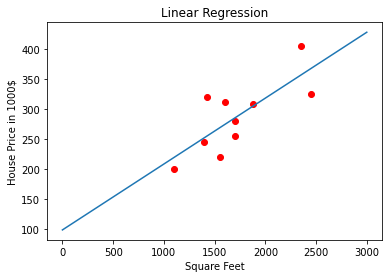

In [46]:
plt.plot(x_origin, y_origin, 'ro')
plt.plot(x_temp, w_0 + w_1 * x_temp)
plt.xlabel('Square Feet')
plt.ylabel('House Price in 1000$')
plt.title('Linear Regression')
plt.show()

# **3. Dùng thư viện scikit-learn**

Khai báo thư viện scikit-learn

In [40]:
from sklearn.linear_model import LinearRegression

Gọi hàm tính toán.

In [43]:
reg = LinearRegression().fit(x_origin, y_origin)

Hiển thị giá trị w_0 và w_1

In [41]:
reg.coef_

array([[0.10976774]])

In [42]:
reg.intercept_

array([98.24832962])

Vẽ đồ thị.

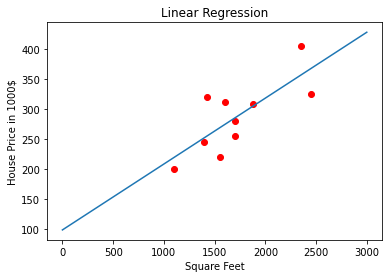

In [49]:
plt.plot(x_origin, y_origin, 'ro')
plt.plot(x_temp, reg.intercept_[0] + reg.coef_[0][0] * x_temp)
plt.xlabel('Square Feet')
plt.ylabel('House Price in 1000$')
plt.title('Linear Regression')
plt.show()

# **4. Dùng ma trận giả đảo (pseudo inverse)**

Tạo ma trận x mở rộng

In [53]:
x_bar = np.concatenate((np.ones((len(x_origin), 1)), x_origin), axis = 1)
x_bar

array([[1.000e+00, 1.400e+03],
       [1.000e+00, 1.600e+03],
       [1.000e+00, 1.700e+03],
       [1.000e+00, 1.875e+03],
       [1.000e+00, 1.100e+03],
       [1.000e+00, 1.550e+03],
       [1.000e+00, 2.350e+03],
       [1.000e+00, 2.450e+03],
       [1.000e+00, 1.425e+03],
       [1.000e+00, 1.700e+03]])

Tính toán giá trị w_0 và w_1 theo công thức:

w = $(\overline{X}^T \overline{X})^\dagger \overline{X}^T$y

In [58]:
w = np.linalg.pinv(x_bar.T @ x_bar) @ x_bar.T @ y_origin
w_0 = w[0][0]
W_1 = w[1][0]

In [61]:
w_0

98.24832962262175

In [62]:
w_1

0.10976773783009834

Vẽ đồ thị.

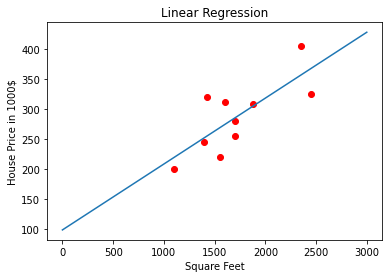

In [56]:
plt.plot(x_origin, y_origin, 'ro')
plt.plot(x_temp, w_0 + w_1 * x_temp)
plt.xlabel('Square Feet')
plt.ylabel('House Price in 1000$')
plt.title('Linear Regression')
plt.show()

# **Kết luận:**
Cả 3 phương pháp cho ra kết quả tương tự nhau.